https://towardsdatascience.com/waffle-charts-using-pythons-matplotlib-94252689a701

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
total_expressions=638
total_expressions-(21+180+179+8+31)

219

In [3]:
df = pd.DataFrame({
    'step status': ['valid', 'declaration', 'assumption', 'explicit fail', 'other fail','no check'],
    'count':        [180,     179,           8,            21,              219,         31] 
})

In [4]:
sum(df['count'])


638

In [5]:
proportions = [(float(value) / total_expressions) for value in df['count']]
proportions

[0.28213166144200624,
 0.28056426332288403,
 0.012539184952978056,
 0.032915360501567396,
 0.3432601880877743,
 0.048589341692789965]

In [6]:
def get_divisors(n):
    """
    https://alexwlchan.net/2019/07/finding-divisors-with-python/
    """
    for i in range(1, int(n / 2) + 1):
        if n % i == 0:
            yield i
    yield n

In [7]:
list(get_divisors(638))

[1, 2, 11, 22, 29, 58, 319, 638]

In [8]:
29*22

638

In [9]:
11*58

638

In [10]:
#width =29
#height=22
width =58
height=11
total= width * height

In [11]:
tiles_per_category = [round(proportion * total_expressions) for proportion in proportions]
tiles_per_category

[180, 179, 8, 21, 219, 31]

In [12]:
waffle = np.zeros((height, width))
category_index = 0
tile_index = 0
for col in range(width):
    for row in range(height):
        tile_index += 1
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
        waffle[row, col] = category_index

<Figure size 432x288 with 0 Axes>

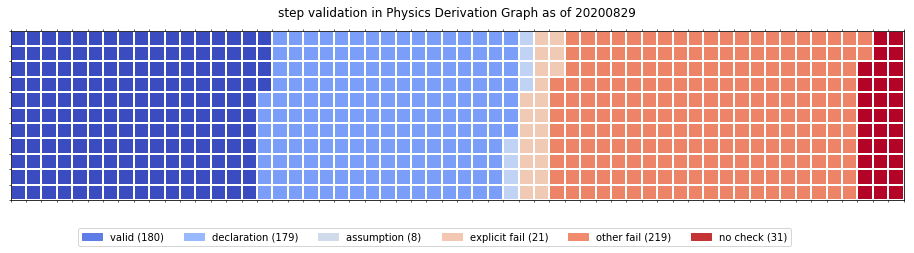

In [26]:
fig = plt.figure();
colormap = plt.cm.coolwarm
plt.matshow(waffle, cmap=colormap)
ax = plt.gca()
ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])
values = df['count']
categories = df['step status']
value_sign = ''
values_cumsum = np.cumsum(values)
#print(values_cumsum)
total_values = values_cumsum[len(values_cumsum) - 1]
#print(total_values)
legend_handles = []
for i, category in enumerate(categories):
    if value_sign == '%':
        label_str = category + ' (' + str(values[i]) + value_sign + ')' 
    else:
        label_str = category + ' (' + value_sign + str(values[i]) + ')'
    color_val = colormap(float(i+.7) / len(categories))

    #print(float(values_cumsum[i]) / total_values)
    #print('color_val=',color_val,'label=',label_str)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str));
    
plt.legend(handles=legend_handles, loc = 'lower center', ncol=len(categories),
          bbox_to_anchor=(0., -0.3, 0.95, 0.1)); #positioning legends
plt.title('step validation in Physics Derivation Graph as of 20200829')
#plt.colorbar()
with open('waffle_chart_step_validation_20200829.png','wb') as fil:
    plt.savefig(fil, format="png")
